# Data Reduction 2 - ASW

## Introduction

Follow the DR1 Reduction step

**Baseline Correction**

3 different subnotebook
- **ASW**
- C2H6
- C2H6_ASW

## Workflow

**Plan**

- Imports
- Input Parameters
- Load data
- T Ramp for reduction

***


## Imports

Describe the libraries we're using here. If there's something unusual, explain what the library is, and why we need it.

- numpy to handle array functions
- math
- matplotlib.pyplot for plotting data
- pandas
- glob
- functools
- ipywidgets
- ...

- json - [Doc](https://docs.python.org/3/library/json.html)

Check if they are all of use.


In [923]:
import numpy 
import math
from math import isnan
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors
import pandas as pd
import glob
from functools import reduce
import ipywidgets as widgets
import matplotlib.gridspec as gridspec
from datetime import datetime
from IPython.core.display import SVG
import re
import json

%matplotlib inline


## Input Parameters

$\color{red}{\text{Implement manually !}}$

In [924]:
# 0.1 Date
date = "2021_05_13"

# Necessary to read the background

date2 = date.replace("_", "")

# 0.2 XP
XP = "XP_1-1"

# 0.3 Sample type
spl = "ASW"

# 0.4 Deposition Temperature
Tdep = "20"

# Colormap normalisation

Tmin = 20
Tmax = 150


# Is there any Isotherm ?

Iso = False

Tiso1 = "130"

Define nscan here so if need be (ie the number of scan is wrong) we can modify it,s value here

## Load Data

In [925]:
# All_RAW_df

All_RAW_df = pd.read_csv("..\..\Data\DATA_PROCESSING\{}\Data\DR1_{}_All-scans.csv".format(date,date))

#All_RAW_df = pd.read_csv("..\..\DATA\DATA-Processing\PAC\{}/Samples/{}/Data/DR/DR1_{}_All-scans.csv".format(XP,date,date))

All_RAW_df = All_RAW_df.iloc[:,1:]

# data_annex
data_annex_df = pd.read_csv("..\..\Data\DATA_PROCESSING\{}\Data\DR1_{}_data_annex.csv".format(date,date))

data_annex_df = data_annex_df.iloc[:,1:]

# XP_list_test

XP_Ramp_df = pd.read_csv('..\..\Data\XP_list_test.csv')

XP_Ramp_df_date = XP_Ramp_df.loc[XP_Ramp_df['Date'] == date]
XP_Ramp_df_date2 = XP_Ramp_df_date.set_index("Date")
#XP_Ramp_df_date2
XP_Ramp_df_T = XP_Ramp_df_date2.T
#XP_Ramp_df_T
XP_Ramp_df_T_f = XP_Ramp_df_T.iloc[1: , :]
#XP_Ramp_df_T_f
XP_Ramp_df_T_f2=XP_Ramp_df_T_f.dropna()
XP_Ramp_df_T_f2

# Produce dictionnary

Tdictionary = dict(zip(XP_Ramp_df_T_f2.index, XP_Ramp_df_T_f2[date]))

## If problem with nscan

In [926]:
#nscan = len(list(All_RAW_df.columns.values.tolist())) - 1

#print(nscan)

## Sanity Check

In [927]:
# All_RAW_df
#data_annex_df
#XP_Ramp_df
#Tdictionary

## <u> Chop the data </u>

Because ASW Sample, Data is choped in 3 range:

- A: OH stretch : (4000 - 2800 cm-1)
- B: Combination bands : (2800 - 1900 cm-1)
- C: Bending modes : (1900 - 800 cm-1)


In [928]:
# OH Stretch

DR1_A_df = All_RAW_df[4150:6639]
#DR1_A_df

# Combination Bands

DR1_B_df = All_RAW_df[2282:4150]
#DR1_B_df

# Bending Modes

DR1_C_df = All_RAW_df[0:2282]
#DR1_C_df

In [929]:
DR1_A_df

Wavenumber  ASW_2021_05_13_1  ASW_2021_05_13_2  ASW_2021_05_13_3  \
4150    2800.660         -0.004097         -0.003198         -0.001942   
4151    2801.142         -0.004114         -0.003204         -0.002133   
4152    2801.624         -0.004079         -0.003159         -0.002061   
4153    2802.106         -0.004055         -0.003134         -0.002166   
4154    2802.589         -0.004004         -0.003079         -0.001960   
...          ...               ...               ...               ...   
6634    3998.257         -0.014595         -0.013468         -0.011945   
6635    3998.739         -0.014566         -0.013438         -0.012043   
6636    3999.221         -0.014556         -0.013415         -0.012140   
6637    3999.703         -0.014677         -0.013496         -0.011767   
6638    4000.185         -0.014722         -0.013514         -0.011276   

      ASW_2021_05_13_4  ASW_2021_05_13_5  ASW_2021_05_13_6  ASW_2021_05_13_7  \
4150         -0.001424         -0.001308         -0.001057         -0.002915   
4151         -0.001606         -0.001485         -0.001243         -0.003044   
4152         -0.001560         -0.001438         -0.001210         -0.002986   
4153         -0.001680         -0.001560         -0.001341         -0.003053   
4154         -0.001496         -0.001381         -0.001170         -0.002909   
...                ...               ...               ...               ...   
6634         -0.011508         -0.011431         -0.011053         -0.012358   
6635         -0.011675         -0.011610         -0.011223         -0.012435   
6636         -0.011840         -0.011791         -0.011443         -0.012548   
6637         -0.011123         -0.011118         -0.010725         -0.012519   
6638         -0.010244         -0.010266         -0.009814         -0.012313   

      ASW_2021_05_13_8  ASW_2021_05_13_9  ...  ASW_2021_05_13_838  \
4150         -0.004909         -0.005342  ...            0.003758   
4151         -0.004982         -0.005416  ...            0.003622   
4152         -0.005003         -0.005445  ...            0.003767   
4153         -0.005062         -0.005496  ...            0.003662   
4154         -0.004986         -0.005437  ...            0.003828   
...                ...               ...  ...                 ...   
6634         -0.014378         -0.014626  ...           -0.000744   
6635         -0.014550         -0.014809  ...           -0.000754   
6636         -0.014743         -0.014998  ...           -0.000700   
6637         -0.014141         -0.014470  ...           -0.001103   
6638         -0.013281         -0.013670  ...           -0.001219   

      ASW_2021_05_13_839  ASW_2021_05_13_840  ASW_2021_05_13_841  \
4150            0.005332            0.006985            0.008197   
4151            0.005209            0.006858            0.008066   
4152            0.005391            0.007038            0.008236   
4153            0.005280            0.006933            0.008116   
4154            0.005462            0.007119            0.008286   
...                  ...                 ...                 ...   
6634            0.001204            0.003410            0.005089   
6635            0.001134            0.003363            0.005049   
6636            0.001189            0.003468            0.005135   
6637            0.000582            0.002855            0.004543   
6638            0.000295            0.002538            0.004256   

      ASW_2021_05_13_842  ASW_2021_05_13_843  ASW_2021_05_13_844  \
4150            0.009159            0.010243            0.011135   
4151            0.009041            0.010121            0.010998   
4152            0.009224            0.010304            0.011168   
4153            0.009115            0.010192            0.011053   
4154            0.009294            0.010365            0.011236   
...                  ...                 ...                 ...   
6634            0.006522          

## <u>Background function definition </u>

### Minimum (single point) within a range

Here we select a minimum within a predefined range (stored in data_annex). 


Idea for latter: Try to not select an individual point as minimum but a local minimum with a rolling average

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

In [930]:
maxA = []
maxAi = []

# We supress the first column (Wavenumber)

DR1_A_df = DR1_A_df.T.iloc[1:].T
DR1_B_df = DR1_B_df.T.iloc[1:].T
DR1_C_df = DR1_C_df.T.iloc[1:].T

# Now compute a new DataFrame indexed by the file names with rows that contain the
# minimum value and the index of that minimum value within specific row ranges
# of the column in data corresponding to the filename.
dataStats = pd.DataFrame.from_dict(
  dict(min1=All_RAW_df.T.iloc[1:].T.iloc[6223:6639].min(axis=0), # min within rows 6000 - end
       mini1=All_RAW_df.T.iloc[1:].T.iloc[6223:6639].idxmin(axis=0), # index of that min
       min2=All_RAW_df.T.iloc[1:].T.iloc[4149:4564].min(axis=0), # min within rows 4000 - 5000
       mini2=All_RAW_df.T.iloc[1:].T.iloc[4149:4564].idxmin(axis=0), # index of that min
       min3=All_RAW_df.T.iloc[1:].T.iloc[3941:4149].min(axis=0), # min within rows 2282 - 2697
       mini3=All_RAW_df.T.iloc[1:].T.iloc[3941:4149].idxmin(axis=0), # index of that min
       min4=All_RAW_df.T.iloc[1:].T.iloc[2282:2490].min(axis=0), # min within rows 415 - 830
       mini4=All_RAW_df.T.iloc[1:].T.iloc[2282:2490].idxmin(axis=0), # index of that min   
       min5=All_RAW_df.T.iloc[1:].T.iloc[2075:2282].min(axis=0), # min within rows 2282 - 2697
       mini5=All_RAW_df.T.iloc[1:].T.iloc[2075:2282].idxmin(axis=0), # index of that min
       min6=All_RAW_df.T.iloc[1:].T.iloc[0:1038].min(axis=0), # min within rows 415 - 830
       mini6=All_RAW_df.T.iloc[1:].T.iloc[0:1038].idxmin(axis=0), # index of that min   
        )
    
)

#print(dataStats)

# select average around minimum value 

#.rolling(4).mean()



# Breaking down what's happening in:
# `data.T.iloc[1:].T.iloc[6000:6800].min(axis=0)`
# 1) `data.T.iloc[1:].T` - This is a cheeky way of stripping away the first column, "Wavenumber",
# 1a) `data.T`, transposes the frame i.e. switches rows and columns
# 1b) `.iloc[1:]` selects all but the first row (previously all but the first column).
# 1c) The final `.T` switches rows and columns back again.
# 2) `.iloc[6000:6800]` selects rows at *positions* between 6000 and 6800. We now have a 
# 2D block of data.
# 3) `.min(axis=0)` computes the column-wise minima of the 2D block we just selected, to 
# give us a 1D Series of numbers.
# 3.1) On the next line, `.idxmin(axis=0)` computes the column-wise index of the minimum for 
# the 2D block we just selected, to give us a 1D Series of index locations.

# We want to subtract a linear function from each column in data, that will
# connect the minimum values in the two ranges. 
# We'll use the `apply` method of pd.DataFrame to do that.
# Apply operates on rows (or columns if the argument axis is set to 0) of a Dataframe to 
# compute a function on the elements of that whole row or column.
#
# We'll define the function that we want to compute.
# The first argument is the column or row data themselves and we are free to 
# provide other data that we need to compute out function.
def computeLinearBackground1(values,     # The column values (e.g. Y)
                            waveNumber, # The corresponding wavenumbers (e.g. X)
                            valueStats  # The dataframe containing the minima and their 
                                        # indices for each file
                 ):
    # extract the correct set of minima using the `name` attribute of the `values` series
    # to index the `valueStats` frame.
    stats = valueStats.loc[values.name, :]
    # compute a linear background function
    gradient = ((stats.min1 - stats.min2)/(stats.mini1 - stats.mini2))
    intercept = stats.min1 - stats.mini1*gradient
    linearBackground1 = (gradient * waveNumber.index) + intercept
    # subtract that function from the column values
    return linearBackground1

def computeLinearBackground2(values,    
                            waveNumber, 
                            valueStats  
                                        
                 ):

    stats = valueStats.loc[values.name, :]
    gradient = ((stats.min3 - stats.min4)/(stats.mini3 - stats.mini4))
    intercept = stats.min3 - stats.mini3*gradient
    linearBackground2 = (gradient * waveNumber.index) + intercept
    return linearBackground2



def computeLinearBackground3(values,   
                            waveNumber, 
                            valueStats  
                 ):
    
    stats = valueStats.loc[values.name, :]
    gradient = ((stats.min5 - stats.min6)/(stats.mini5 - stats.mini6))
    intercept = stats.min5 - stats.mini5*gradient
    linearBackground3 = (gradient * waveNumber.index) + intercept
    return linearBackground3

# Finally apply our function to the columns of the dataframe (except the wavenumber column)
# We specify axis=0 to operate on the columns (confusingly this is referred to as *along*
# the index direction in the docs), and pass the first (wavenumber) column and the summary 
# statistics dataframe, wrapped in a tuple, as the `args` argument.
backgroundsA = DR1_A_df.T.iloc[0:].T.apply(computeLinearBackground1, axis=0, args=(DR1_A_df.T.iloc[0], dataStats))
backgroundsB = DR1_B_df.T.iloc[0:].T.apply(computeLinearBackground2, axis=0, args=(DR1_B_df.T.iloc[0], dataStats))
backgroundsC = DR1_C_df.T.iloc[0:].T.apply(computeLinearBackground3, axis=0, args=(DR1_C_df.T.iloc[0], dataStats))


### Sanity Check

In [931]:
#DR1_A_df

## <u>Baseline correction</u>

### data - background subtraction 

In [932]:
dataA_BC = pd.DataFrame(DR1_A_df - backgroundsA)
dataB_BC = pd.DataFrame(DR1_B_df - backgroundsB)
dataC_BC = pd.DataFrame(DR1_C_df - backgroundsC)


### Cleaning and Sanity Check

We reinsert the Wavenumber that was removed prior to the baseline function aplied

In [933]:
 dataA_BC
# dataB_BC_U
# dataC_BC_U

ASW_2021_05_13_1  ASW_2021_05_13_2  ASW_2021_05_13_3  ASW_2021_05_13_4  \
4150      1.295855e-05         -0.000226          0.000212      2.439467e-04   
4151     -8.673617e-19         -0.000228          0.000025      6.661646e-05   
4152      3.979145e-05         -0.000179          0.000101      1.163832e-04   
4153      6.790689e-05         -0.000150          0.000000     -1.517883e-18   
4154      1.227323e-04         -0.000091          0.000210      1.889398e-04   
...                ...               ...               ...               ...   
6634      1.102582e-04          0.000106          0.000186      3.244365e-04   
6635      1.431737e-04          0.000140          0.000092      1.609282e-04   
6636      1.574191e-04          0.000168          0.000000      0.000000e+00   
6637      4.102455e-05          0.000091          0.000377      7.211818e-04   
6638      0.000000e+00          0.000077          0.000872      1.604154e-03   

      ASW_2021_05_13_5  ASW_2021_05_13_6  ASW_2021_05_13_7  ASW_2021_05_13_8  \
4150      2.396046e-04      2.718734e-04          0.000127          0.000107   
4151      6.644108e-05      8.970293e-05          0.000002          0.000039   
4152      1.173295e-04      1.268895e-04          0.000063          0.000022   
4153      2.168404e-19     -4.336809e-19          0.000000         -0.000033   
4154      1.830035e-04      1.749395e-04          0.000148          0.000046   
...                ...               ...               ...               ...   
6634      3.510691e-04      3.818229e-04          0.000182          0.000357   
6635      1.766795e-04      2.161515e-04          0.000109          0.000188   
6636      0.000000e+00      0.000000e+00          0.000000          0.000000   
6637      6.771105e-04      7.214585e-04          0.000032          0.000606   
6638      1.533111e-03      1.636628e-03          0.000242          0.001470   

      ASW_2021_05_13_9  ASW_2021_05_13_10  ...  ASW_2021_05_13_838  \
4150          0.000143           0.000152  ...        1.339446e-04   
4151          0.000073           0.000093  ...       -4.336809e-19   
4152          0.000047           0.000059  ...        1.469734e-04   
4153          0.000000           0.000000  ...        4.377782e-05   
4154          0.000063           0.000042  ...        2.118492e-04   
...                ...                ...  ...                 ...   
6634          0.000365           0.000393  ...        4.667534e-04   
6635          0.000185           0.000182  ...        4.587935e-04   
6636          0.000000           0.000000  ...        5.148134e-04   
6637          0.000532           0.000501  ...        1.132756e-04   
6638          0.001336           0.001301  ...       -6.505213e-19   

      ASW_2021_05_13_839  ASW_2021_05_13_840  ASW_2021_05_13_841  \
4150        1.267519e-04        1.301570e-04            0.000136   
4151        5.271728e-06        5.195905e-06            0.000007   
4152        1.894746e-04        1.873209e-04            0.000178   
4153        7.991346e-05        8.376481e-05            0.000060   
4154        2.642273e-04        2.709558e-04            0.000231   
...                  ...                 ...                 ...   
6634        9.017384e-04        8.647472e-04            0.000826   
6635        8.330263e-04        8.200961e-04            0.000788   
6636        8.904892e-04        9.266531e-04            0.000876   
6637        2.849736e-04        3.152660e-04            0.000285   
6638        4.336809e-19       -4.336809e-19            0.000000   

      ASW_2021_05_13_842  ASW_2021_05_13_843  ASW_2021_05_13_844  \
4150            0.000138        1.519298e-04            0.000136   
4151            0.000021        3.061965e-05            0.000000   
4152            0.000205        2.144695e-04            0.000171   
4153            0.000098        1.039393e-04            0.000057   
4154            0.000278        2.778991e-04            0.000241   
...               

In [934]:
dataA_BC.insert(0, 'Wavenumber', All_RAW_df['Wavenumber'])
dataB_BC.insert(0, 'Wavenumber', All_RAW_df['Wavenumber'])
dataC_BC.insert(0, 'Wavenumber', All_RAW_df['Wavenumber'])

backgroundsA.insert(0, 'Wavenumber', All_RAW_df['Wavenumber'])
backgroundsB.insert(0, 'Wavenumber', All_RAW_df['Wavenumber'])
backgroundsC.insert(0, 'Wavenumber', All_RAW_df['Wavenumber'])

#### Concatenation

In [935]:
All_data_A = dataC_BC.append(dataB_BC).drop_duplicates().reset_index(drop=True)
All_data_BC = All_data_A.append(dataA_BC).drop_duplicates().reset_index(drop=True)

C:\Users\vdegu\AppData\Local\Temp\ipykernel_11436\4103712282.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  All_data_A = dataC_BC.append(dataB_BC).drop_duplicates().reset_index(drop=True)
C:\Users\vdegu\AppData\Local\Temp\ipykernel_11436\4103712282.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  All_data_BC = All_data_A.append(dataA_BC).drop_duplicates().reset_index(drop=True)


In [936]:
#All_data_BC

#### Export as csv

Not up to date

In [937]:
All_data_BC.to_csv("..\..\Data\DATA_PROCESSING\{}\Data\DR2_{}_All-scans.csv".format(date,date))

## <u>Max Absorbance</u>

### Preliminary work

A first step in our analysis is to extract and use the maximum absorbance in order to make a first comparison of the frequency shifts with respect to temperature for each sample.

#### Range B

For range B (combination modes), we need to supress the CO2 signature (that would otherwise contribute to the max A value for this range). As a first guess we aim to supress data from 2390 to 2290 wavenumber

#### Range C

Concerning range C, we are only aiming for the maximum absorbance of the bending modes but the libration modes have a contribution more important. However the peak is incomplete and we need to supress it. <br>
Same approach as previously will be used and we aim to cut the data at wavenumber = 1040 cm-1

In [938]:
dataB_BC_U = dataB_BC.drop(dataB_BC.index[808:1016])
dataC_BC_U = dataC_BC.drop(dataC_BC.index[0:498])

###  Extract max A

Here we look for 4 maximum:
- two for the range A (1 with the baseline corrected scan and one from the unreduced data, to check that they concord and that the reduction routine does not affect the spectral signature)
- one for range B (using dataB_BC_U that excude the CO2 signature)
- one for range C (using dataC_BC_U that excude the libration modes)

<div class="alert alert-block alert-danger">
Why A is iloc 0 and others iloc 1 ? to check and smooth!
</div>

In [939]:
#Data max from unreduced data in range A 

dataA_Max = pd.DataFrame.from_dict(
  dict(maxA0=DR1_A_df.T.iloc[0:].T.iloc[0:].max(axis=0), # min within rows 6000 - end
       maxA0i=DR1_A_df.T.iloc[0:].T.iloc[0:].idxmax(axis=0),  

        )
)

#Data max from Baseline Corrected Data in range A 

dataA_BC_Max = pd.DataFrame.from_dict(
  dict(maxA=dataA_BC.T.iloc[1:].T.iloc[1:].max(axis=0), # min within rows 6000 - end
       maxAi=dataA_BC.T.iloc[1:].T.iloc[1:].idxmax(axis=0),  

        )
)

#Data max from Baseline Corrected Data in range B

dataB_BC_Max = pd.DataFrame.from_dict(
  dict(maxB=dataB_BC_U.T.iloc[1:].T.iloc[1:].max(axis=0), # min within rows 6000 - end
       maxBi=dataB_BC_U.T.iloc[1:].T.iloc[1:].idxmax(axis=0),  

        )
)

#Data max from Baseline Corrected Data in range C

dataC_BC_Max = pd.DataFrame.from_dict(
  dict(maxC=dataC_BC_U.T.iloc[1:].T.iloc[1:].max(axis=0), # min within rows 6000 - end
       maxCi=dataC_BC_U.T.iloc[1:].T.iloc[1:].idxmax(axis=0),  

        )
)




### Clean 

In [940]:
wavelength = All_RAW_df.T.iloc[0]

# A DR2

dataA_BC_Max = dataA_BC_Max.reset_index()
dataA_BC_Max['Name'] = dataA_BC_Max['index']
dataA_BC_Max = dataA_BC_Max.T.iloc[1:].T

dataA_BC_Max1 = dataA_BC_Max.set_index('maxAi',drop=True)
dataA_BC_Max2 = dataA_BC_Max1.join(wavelength, on='maxAi')
dataA_BC_Max2 = dataA_BC_Max2.reset_index()
dataA_BC_Max_F = dataA_BC_Max2.set_index(dataA_BC_Max.index)
dataA_BC_Max_F.rename(columns={'Wavenumber': 'maxAw'}, inplace=True)

# A DR1

dataA_Max = dataA_Max.reset_index()
dataA_Max['Name'] = dataA_Max['index']
dataA_Max = dataA_Max.T.iloc[1:].T

dataA_Max1 = dataA_Max.set_index('maxA0i',drop=True)
dataA_Max2 = dataA_Max1.join(wavelength, on='maxA0i')
dataA_Max2 = dataA_Max2.reset_index()
dataA_Max_F = dataA_Max2.set_index(dataA_Max.index)
dataA_Max_F.rename(columns={'Wavenumber': 'maxA0w'}, inplace=True)

# B DR2



dataB_BC_Max = dataB_BC_Max.reset_index()
dataB_BC_Max['Name'] = dataB_BC_Max['index']
dataB_BC_Max = dataB_BC_Max.T.iloc[1:].T

dataB_BC_Max1 = dataB_BC_Max.set_index('maxBi',drop=True)
dataB_BC_Max2 = dataB_BC_Max1.join(wavelength, on='maxBi')
dataB_BC_Max2 = dataB_BC_Max2.reset_index()
dataB_BC_Max_F = dataB_BC_Max2.set_index(dataB_BC_Max.index)
dataB_BC_Max_F.rename(columns={'Wavenumber': 'maxBw'}, inplace=True)

# C DR2

dataC_BC_Max = dataC_BC_Max.reset_index()
dataC_BC_Max['Name'] = dataC_BC_Max['index']
dataC_BC_Max = dataC_BC_Max.T.iloc[1:].T

dataC_BC_Max1 = dataC_BC_Max.set_index('maxCi',drop=True)
dataC_BC_Max2 = dataC_BC_Max1.join(wavelength, on='maxCi')
dataC_BC_Max2 = dataC_BC_Max2.reset_index()
dataC_BC_Max_F = dataC_BC_Max2.set_index(dataC_BC_Max.index)
dataC_BC_Max_F.rename(columns={'Wavenumber': 'maxCw'}, inplace=True)

C:\Users\vdegu\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\vdegu\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\vdegu\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
C:\Users\vdegu\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequen

In [941]:
#dataA_Max_F

___Insert column scan number___ 

to be able to link data_annex with XP_Ramp_df

In [942]:
nscan = len(list(dataA_BC_Max_F.index.values.tolist()))
scan_number = pd.Series(range(1,nscan+1))
scan_number.astype(int)

0        1
1        2
2        3
3        4
4        5
      ... 
842    843
843    844
844    845
845    846
846    847
Length: 847, dtype: int32

In [943]:
dataA_BC_Max_F['scan_number'] = scan_number

###  Append to data Annex

In [944]:
data_annex_df = pd.merge(data_annex_df, dataA_BC_Max_F, on="Name")
data_annex_df = pd.merge(data_annex_df, dataA_Max_F, on="Name")
data_annex_df = pd.merge(data_annex_df, dataB_BC_Max_F, on="Name")
data_annex_df = pd.merge(data_annex_df, dataC_BC_Max_F, on="Name")


Data annex already complete for most of the samples

### Sanity Check

In [945]:
data_annex_df

Name      min1  index1      min2  index2      min3  index3  \
0      ASW_2021_05_13_1 -0.014722    6638 -0.004114    4151 -0.004143    4140   
1      ASW_2021_05_13_2 -0.013557    6630 -0.003223    4209 -0.003271    4140   
2      ASW_2021_05_13_3 -0.012140    6636 -0.002166    4153 -0.002128    4134   
3      ASW_2021_05_13_4 -0.011840    6636 -0.001680    4153 -0.001689    4134   
4      ASW_2021_05_13_5 -0.011791    6636 -0.001560    4153 -0.001565    4134   
..                  ...       ...     ...       ...     ...       ...     ...   
842  ASW_2021_05_13_843  0.007231    6638  0.010093    4149  0.009504    3951   
843  ASW_2021_05_13_844  0.008622    6638  0.010998    4151  0.010368    3951   
844  ASW_2021_05_13_845  0.009758    6638  0.011605    4151  0.010888    3942   
845  ASW_2021_05_13_846  0.010426    6638  0.011803    4149  0.011117    3961   
846  ASW_2021_05_13_847  0.011142    6638  0.011994    4149  0.011298    3942   

         min4  index4      min5  ...  scan_number  maxA0i     maxA0    maxA0w  \
0    0.002053    2392  0.002395  ...            1    5120  0.268766  3268.321   
1    0.002862    2392  0.003149  ...            2    5120  0.270903  3268.321   
2    0.003635    2390  0.003998  ...            3    5101  0.320648  3259.160   
3    0.004012    2447  0.004475  ...            4    5099  0.333521  3258.196   
4    0.004190    2388  0.004680  ...            5    5099  0.336216  3258.196   
..        ...     ...       ...  ...          ...     ...       ...       ...   
842  0.008941    2286  0.008657  ...          843    5041   0.09924  3230.233   
843  0.009187    2286  0.008756  ...          844    5047  0.076502  3233.125   
844  0.009167    2286  0.008658  ...          845    5051  0.056008  3235.054   
845  0.009026    2286  0.008403  ...          846    4941  0.039957  3182.021   
846  0.008909    2286  0.008190  ...          847    4922  0.028178  3172.860   

     maxBi      maxB     maxBw  maxCi      maxC     maxCw  
0     2928  0.008403  2211.504   1790  0.021825  1662.847  
1     2926  0.008431  2210.540   1790  0.021791  1662.847  
2     2953  0.009904  2223.557   1780  0.020271  1658.026  
3     2943  0.010262  2218.736   1771  0.019722  1653.686  
4     2972  0.010508  2232.718   1781  0.019706  1658.508  
..     ...       ...       ...    ...       ...       ...  
842   2974  0.003747  2233.682   1758  0.005088  1647.419  
843   2984  0.003207  2238.503   1758  0.004406  1647.419  
844   2915  0.002778  2205.237   1894  0.003936  1712.988  
845   2896  0.002373  2196.076   1913  0.003616  1722.148  
846   2838  0.002158  2168.113   1923  0.003434  1726.969  

[847 rows x 28 columns]

## <u>Plotting</u> 

### Full range 

In [946]:
#nscan = len(list(dataA_BC.columns.values.tolist()))

ymax =   data_annex_df.iloc[1:,16].astype(float).max()
ymin =   data_annex_df.iloc[1:,16].astype(float).min()
ymax2 = ymax + 0.01
ymin2 = ymin - 0.01 

In [947]:
All_data_BC

Wavenumber  ASW_2021_05_13_1  ASW_2021_05_13_2  ASW_2021_05_13_3  \
0       799.8442          0.062244          0.062848          0.072023   
1       800.3264          0.061762          0.062692          0.068305   
2       800.8085          0.061161          0.062357          0.063099   
3       801.2906          0.059575          0.060743          0.056940   
4       801.7727          0.059281          0.060275          0.057237   
...          ...               ...               ...               ...   
6634   3998.2570          0.000110          0.000106          0.000186   
6635   3998.7390          0.000143          0.000140          0.000092   
6636   3999.2210          0.000157          0.000168          0.000000   
6637   3999.7030          0.000041          0.000091          0.000377   
6638   4000.1850          0.000000          0.000077          0.000872   

      ASW_2021_05_13_4  ASW_2021_05_13_5  ASW_2021_05_13_6  ASW_2021_05_13_7  \
0             0.074576          0.076550          0.075974          0.072891   
1             0.071526          0.073525          0.072354          0.072463   
2             0.066802          0.068987          0.067224          0.070592   
3             0.058882          0.061223          0.059633          0.063521   
4             0.057902          0.059739          0.058847          0.061827   
...                ...               ...               ...               ...   
6634          0.000324          0.000351          0.000382          0.000182   
6635          0.000161          0.000177          0.000216          0.000109   
6636          0.000000          0.000000          0.000000          0.000000   
6637          0.000721          0.000677          0.000721          0.000032   
6638          0.001604          0.001533          0.001637          0.000242   

      ASW_2021_05_13_8  ASW_2021_05_13_9  ...  ASW_2021_05_13_838  \
0             0.074236          0.072833  ...        7.855354e-02   
1             0.075955          0.075466  ...        7.718212e-02   
2             0.075846          0.076272  ...        7.513965e-02   
3             0.065602          0.065987  ...        7.331949e-02   
4             0.060778          0.061422  ...        7.176642e-02   
...                ...               ...  ...                 ...   
6634          0.000357          0.000365  ...        4.667534e-04   
6635          0.000188          0.000185  ...        4.587935e-04   
6636          0.000000          0.000000  ...        5.148134e-04   
6637          0.000606          0.000532  ...        1.132756e-04   
6638          0.001470          0.001336  ...       -6.505213e-19   

      ASW_2021_05_13_839  ASW_2021_05_13_840  ASW_2021_05_13_841  \
0           7.381599e-02        6.963516e-02            0.066060   
1           7.225359e-02        6.825882e-02            0.065306   
2           7.060697e-02        6.580663e-02            0.064100   
3           6.890132e-02        6.358024e-02            0.062907   
4           6.787432e-02        6.258732e-02            0.061501   
...                  ...                 ...                 ...   
6634        9.017384e-04        8.647472e-04            0.000826   
6635        8.330263e-04        8.200961e-04            0.000788   
6636        8.904892e-04        9.266531e-04            0.000876   
6637        2.849736e-04        3.152660e-04            0.000285   
6638        4.336809e-19       -4.336809e-19            0.000000   

      ASW_2021_05_13_842  ASW_2021_05_13_843  ASW_2021_05_13_844  \
0               0.062993        5.766546e-02            0.054886   
1               0.061166        5.626183e-02            0.053632   
2               0.058939        5.436770e-02            0.051619   
3               0.058003        5.329449e-02            0.050259   
4               0.056967        5.189903e-02            0.049391   
...                  ...                 ...                 ...   
6634            0.000764        7.

848


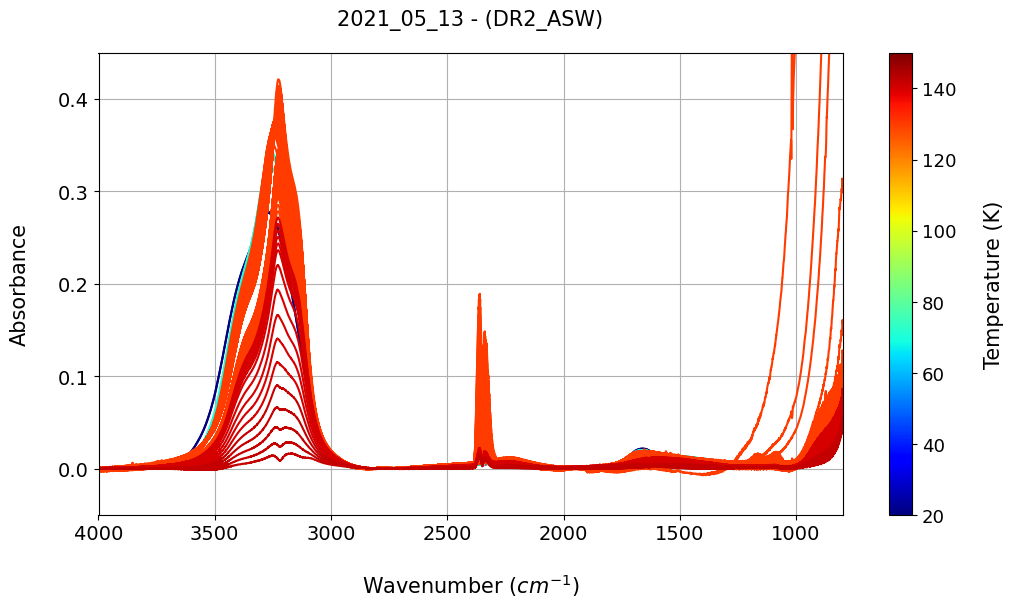

In [949]:
nscan = len(list(All_RAW_df.columns.values.tolist()))

print(nscan)


fig= plt.figure(figsize=(12,6))

for keys, values in Tdictionary.items():
    
    temp = int(keys)
    scan = json.loads(values)

    normalize = mcolors.Normalize(vmin=Tmin, vmax=Tmax)
    colormap = cm.jet

    for i in scan:

        if i < 848:

                    
            plt.plot(All_data_BC.Wavenumber, All_data_BC['{}_{}_{}'.format(spl, date, i)], color=colormap(normalize(temp)))
    
    
    

plt.title('{0} - (DR2_ASW)'.format(date), fontsize=15, pad=20)
plt.axis([4000,800,-0.05,0.45])
plt.xlabel('Wavenumber ($cm^{-1}$)', labelpad=20).set_fontsize(15)
plt.ylabel('Absorbance', labelpad=20).set_fontsize(15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#ax = fig.gca()
plt.grid()
#plt.legend()

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(nscan)
cbar = plt.colorbar(scalarmappaple)
cbar.ax.tick_params(labelsize=13)
cbar.set_label('Temperature (K)', labelpad=20 ,size=15)



plt.savefig("..\..\Data\DATA_PROCESSING\{}\Plots\DR2_{}_Full-range.png".format(date,date))


plt.show()

###  Oh stretch

#### Baseline correction

In [ ]:
nscan = len(list(dataA_BC.columns.values.tolist()))

nscan2 = nscan//int(2)
nscan1 = nscan2*int(5)

figure, panels = plt.subplots(figsize=(12, nscan1), ncols=2, nrows=nscan2)

for panel, column in zip(panels.flatten(), dataA_BC.columns[1:]):
    panel.plot(dataA_BC.Wavenumber, dataA_BC[column], label="data")
    panel.plot(dataA_BC.Wavenumber, backgroundsA[column], ls="dashed",  label="bg")

    panel.plot(dataA_BC.Wavenumber, dataA_BC[column]+ backgroundsA[column], ls="dotted",  label="data+bg (RAW)")

    
    
    #panel.legend()
    panel.set_xlabel("wavenumber")
    panel.invert_xaxis()
    panel.set_title(column)
    panel.legend()

    plt.savefig("..\..\Data\DATA_PROCESSING\{}\Plots\DR2_{}_BCA.png".format(date,date), bbox_inches='tight')
    
plt.show()
    
    
#plt.tight_layout()
    

####  All scans 

(using scan number - All data)
<br>
Idea for later : plot OH and maxA together

[Marker modification](https://matplotlib.org/stable/api/markers_api.html)

848


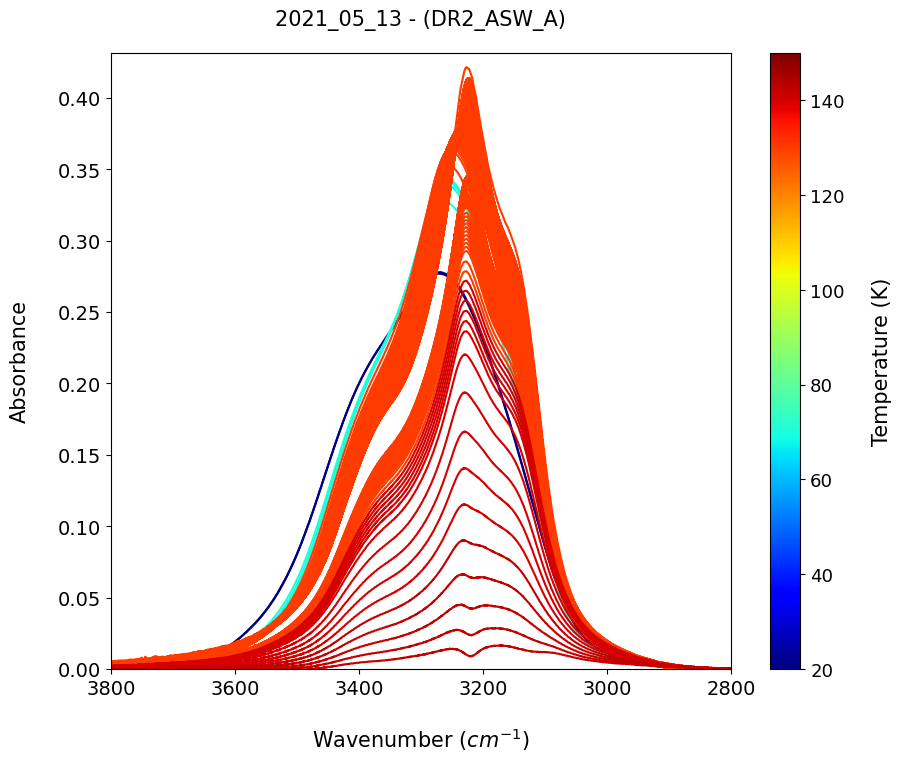

In [950]:
nscan = len(list(All_RAW_df.columns.values.tolist()))

print(nscan)


fig= plt.figure(figsize=(10,8))

for keys, values in Tdictionary.items():
    
    temp = int(keys)
    scan = json.loads(values)

    normalize = mcolors.Normalize(vmin=Tmin, vmax=Tmax)
    colormap = cm.jet

    for i in scan:
        
        
        if i < 848:
        
           

            plt.plot(dataA_BC.Wavenumber, dataA_BC['{}_{}_{}'.format(spl, date, i)], color=colormap(normalize(temp)))

    

plt.title('{0} - (DR2_ASW_A)'.format(date), fontsize=15, pad=20)
plt.axis([3800,2800,0,ymax2])
plt.xlabel('Wavenumber ($cm^{-1}$)', labelpad=20).set_fontsize(15)
plt.ylabel('Absorbance', labelpad=20).set_fontsize(15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#ax = fig.gca()
#plt.grid()
#plt.legend()

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(nscan)
cbar = plt.colorbar(scalarmappaple)
cbar.ax.tick_params(labelsize=13)
cbar.set_label('Temperature (K)', labelpad=20 ,size=15)

plt.savefig("..\..\Data\DATA_PROCESSING\{}\Plots\DR2_{}_A.png".format(date,date))

plt.show()

#### 2.4.A.4b All scans (using dictionnary vale - discrete T)

later

#### 2.4.A.4 Max Absorbance (peak frequency shift) - Clean

In [951]:
#print(data_annex_df.loc[0])

In [952]:
print(nscan)

848


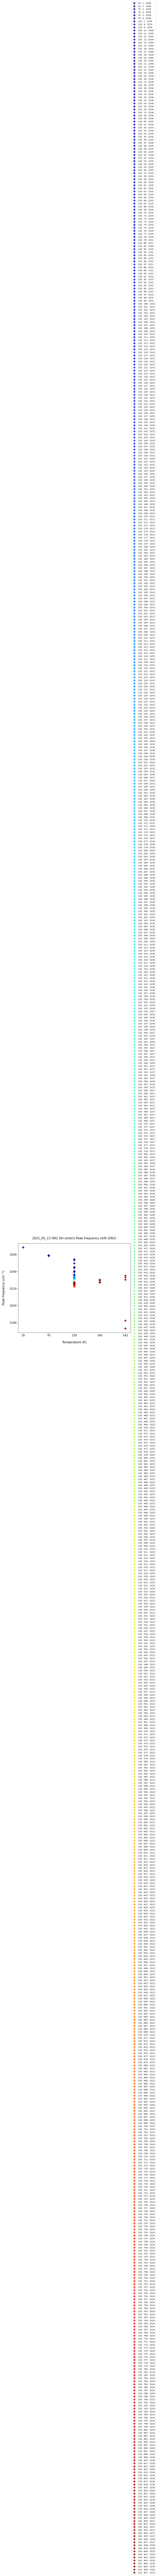

In [953]:
fig= plt.figure(figsize=(10,8))

for keys, values in Tdictionary.items():
    
    #temp = int(keys)
    scan = json.loads(values)

    normalize = mcolors.Normalize(vmin=Tmin, vmax=Tmax)
    colormap = cm.jet

    for i in scan:
        
                
        if i < 848:
        
           

            plt.plot(keys, data_annex_df.iloc[i-1,17], '+', mew=3, ms=12, c=cm.jet(i/nscan), label= str(keys)+" - "+str(i)+" - "+str(int(data_annex_df.iloc[i-1,17])))
        
        #plt.plot(keys, data_annex_df.iloc[i,21], '.', mew=3, ms=12, c=cm.jet(i/nscan),label= str(keys)+" - "+str(i+1)+" - "+str(int(data_annex_df.iloc[i,21])))

        
plt.title('{0} DR2 OH stretch Peak frequency shift (DR2)'.format(date), fontsize=15, pad=20)
#plt.axis([3210,3270])
plt.xlabel('Temperature (K)', labelpad=20).set_fontsize(15)
plt.ylabel('Peak frequency ($cm^{-1}$)', labelpad=20).set_fontsize(15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#ax = fig.gca()
#plt.grid()
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("..\..\Data\DATA_PROCESSING\{}\Plots\DR2_{}_PeakA-frequency_shift.png".format(date,date), bbox_inches='tight')


plt.show()

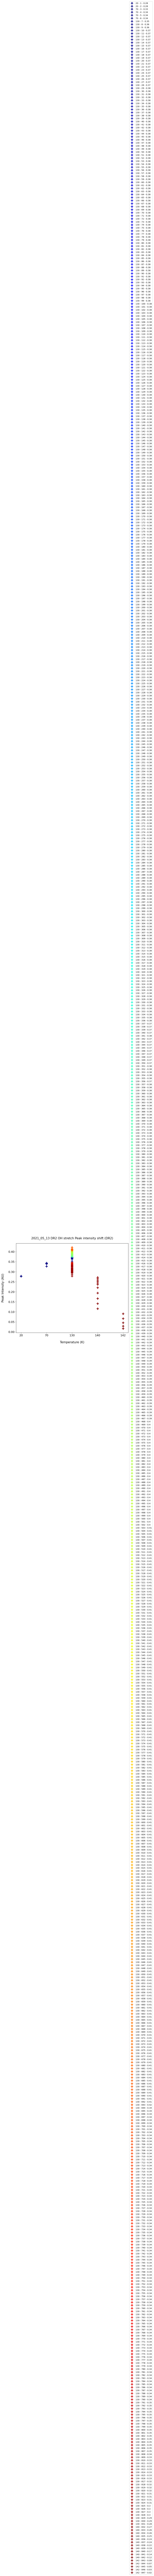

In [954]:
fig= plt.figure(figsize=(10,8))

for keys, values in Tdictionary.items():
    
    #temp = int(keys)
    scan = json.loads(values)

    normalize = mcolors.Normalize(vmin=Tmin, vmax=Tmax)
    colormap = cm.jet

    for i in scan:
        
        
        if i < 848:
        
           

            plt.plot(keys, data_annex_df.iloc[i-1,16], '+', mew=3, ms=12, c=cm.jet(i/nscan), label= str(keys)+" - "+str(i)+" - "+str(float("{:.2f}".format(data_annex_df.iloc[i-1,16]))))
        
        #plt.plot(keys, data_annex_df.iloc[i,21], '.', mew=3, ms=12, c=cm.jet(i/nscan),label= str(keys)+" - "+str(i+1)+" - "+str(int(data_annex_df.iloc[i,21])))

        
plt.title('{0} DR2 OH stretch Peak intensity shift (DR2)'.format(date), fontsize=15, pad=20)
#plt.axis([3210,3270])
plt.xlabel('Temperature (K)', labelpad=20).set_fontsize(15)
plt.ylabel('Peak Intensity (AU)', labelpad=20).set_fontsize(15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#ax = fig.gca()
#plt.grid()
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("..\..\Data\DATA_PROCESSING\{}\Plots\DR2_{}_PeakA-Intensity_shift.png".format(date,date), bbox_inches='tight')


plt.show()

#### 2.4.A.5 Max Absorbance (peak frequency shift) - Isotherm 1

In [955]:
if Iso == True:

    fig = plt.figure(figsize=(8,6))

    for keys, values in Isodic1.items():

        plt.plot(keys, data_anex_df.iloc[values,17], '+', mew=3, ms=12, c=cm.jet(values/nscan),label= str(keys)+" - "+str(values+1)+" - "+str(int(data_anex_df.iloc[values,17])))
        
    plt.title('{0} DR2 OH stretch Peak frequency Isotherm at {1} K'.format(date,Tiso1))
    #plt.axis([3210,3270])
    plt.xlabel('Time (h)').set_fontsize(13)
    plt.ylabel('Peak frequency (cm-1)').set_fontsize(13)
    ax = fig.gca()
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))    
    #plt.grid()
    #plt.legend()


    #plt.savefig('D:\DATA-Processing\PAC\{}/Samples/{}/Plots/DR/DR2_{}_PeakA-frequency_Iso_{}.png'.format(XP, date, date, Tiso1))

    plt.show()
    
else:
    print("no need")

no need


In [956]:
if Iso == True:

    fig = plt.figure(figsize=(8,6))

    for keys, values in Isodic1.items():

        plt.plot(keys, data_anex_df.iloc[values,16], '+', mew=3, ms=12, c=cm.jet(values/nscan),label= str(keys)+" - "+str(values+1)+" - "+str(int(data_anex_df.iloc[values,17])))
        
    plt.title('{0} DR2 Max A Isotherm at {1} K'.format(date,Tiso1))
    #plt.axis([3210,3270])
    plt.xlabel('Time (h)').set_fontsize(13)
    plt.ylabel('Peak frequency (cm-1)').set_fontsize(13)
    ax = fig.gca()
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))    
    #plt.grid()
    #plt.legend()


    plt.savefig('D:\DATA-Processing\PAC\{}/Samples/{}/Plots/DR/DR2_{}_max_A_Iso_{}.png'.format(XP, date, date, Tiso1))

    plt.show()
    
else:
    print("no need")

no need


###  2.4.B Comb Bands

#### 2.4.B.1 Baseline correction

In [957]:
nscan = len(list(dataB_BC.columns.values.tolist()))

nscan2 = nscan//int(2)
nscan1 = nscan2*int(5)

figure, panels = plt.subplots(figsize=(10, nscan1), ncols=2, nrows=nscan2)

for panel, column in zip(panels.flatten(), dataB_BC.columns[1:]):
    panel.plot(dataB_BC.Wavenumber, dataB_BC[column], label="data")
    panel.plot(dataB_BC.Wavenumber, backgroundsB[column], ls="dashed",  label="bg")

    panel.plot(dataB_BC.Wavenumber, dataB_BC[column] + backgroundsB[column], ls="dotted",  label="data+bg (RAW)")

    
    
    #panel.legend()
    panel.set_xlabel("wavenumber")
    panel.set_title(column)
    panel.invert_xaxis()
    panel.legend()
    
    plt.savefig("..\..\Data\DATA_PROCESSING\{}\Plots\DR2_{}_BCB.png".format(date,date), bbox_inches='tight')
    
plt.show()
    
    
#plt.tight_layout()
    

ValueError: Image size of 1000x212000 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1000x212000 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x212000 with 848 Axes>

#### 2.4.B.3 All scans

848


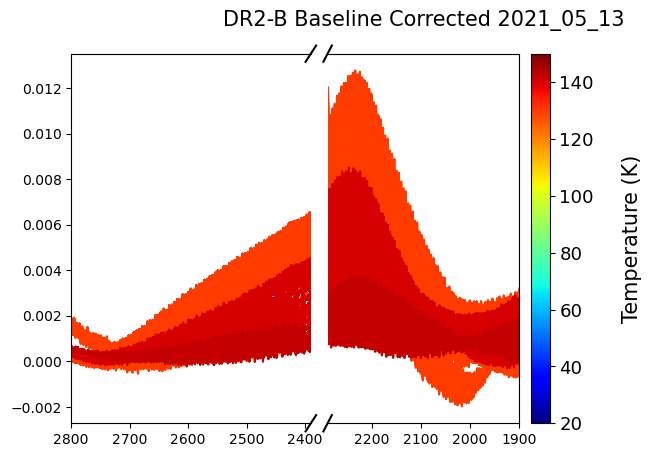

In [958]:
nscan = len(list(All_RAW_df.columns.values.tolist()))

print(nscan)


f,(ax,ax2) = plt.subplots(1,2,sharey=True)



for keys, values in Tdictionary.items():
    
    temp = int(keys)
    scan = json.loads(values)

    normalize = mcolors.Normalize(vmin=Tmin, vmax=Tmax)
    colormap = cm.jet

    for i in scan:
        
                
        if i < 848:
        
           

            ax.plot(dataB_BC_U.Wavenumber, dataB_BC_U['{}_{}_{}'.format(spl, date, i)], color=colormap(normalize(temp)))
            ax2.plot(dataB_BC_U.Wavenumber, dataB_BC_U['{}_{}_{}'.format(spl, date, i)], color=colormap(normalize(temp)))
    
    

ax.set_xlim(2800,2390)
ax2.set_xlim(2290,1900)

ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax.yaxis.tick_left()
ax2.yaxis.set_visible(False)

d = .022 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

f.subplots_adjust(wspace=.070)

plt.title('DR2-B Baseline Corrected {0}'.format(date), fontsize=15, pad=20)
#plt.axis([2800,1900,0,0.015])
#plt.xlabel('Wavenumber (cm-1)').set_fontsize(13)
#plt.ylabel('Absorbance').set_fontsize(13)
#ax = fig.gca()
#plt.grid()
#plt.legend()

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(nscan)
cbar = plt.colorbar(scalarmappaple)
cbar.ax.tick_params(labelsize=13)
cbar.set_label('Temperature (K)', labelpad=20 ,size=15)

plt.savefig("..\..\Data\DATA_PROCESSING\{}\Plots\DR2_{}_B.png".format(date,date), bbox_inches='tight')

plt.show()

#### 2.4.B.4 Max A + Redshift

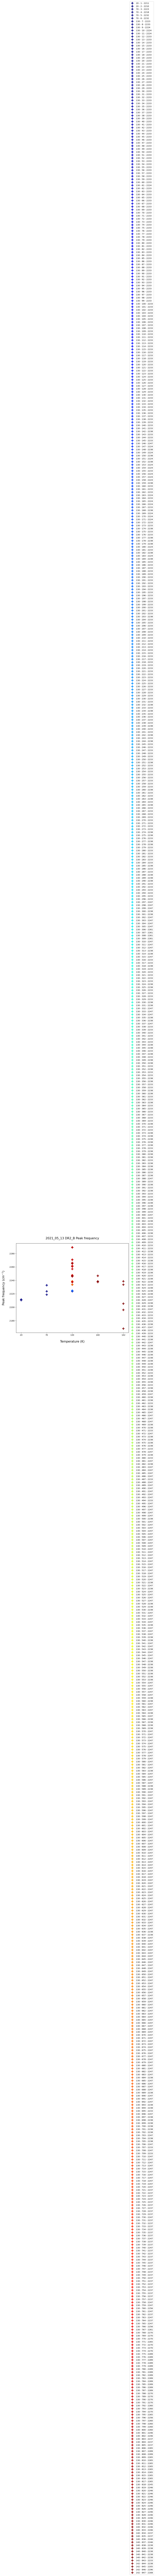

In [959]:
fig= plt.figure(figsize=(10,8))

for keys, values in Tdictionary.items():
    
    #temp = int(keys)
    scan = json.loads(values)

    normalize = mcolors.Normalize(vmin=Tmin, vmax=Tmax)
    colormap = cm.jet

    for i in scan:
        
                
        if i < 848:
        
           

            plt.plot(keys, data_annex_df.iloc[i-1,24], '+', mew=3, ms=12, c=cm.jet(i/nscan),label= str(keys)+" - "+str(i)+" - "+str(int(data_annex_df.iloc[i-1,24])))
        #plt.plot(keys, data_anex_df.iloc[values,21], '.', mew=3, ms=12, c=cm.jet(values/nscan),label= str(keys)+" - "+str(values+1)+" - "+str(int(data_anex_df.iloc[values,21])))
        
        
plt.title('{0} DR2_B Peak frequency'.format(date), fontsize=15, pad=20)
#plt.axis([3210,3270])
plt.xlabel('Temperature (K)', labelpad=20).set_fontsize(15)
plt.ylabel('Peak frequency ($cm^{-1}$)', labelpad=20).set_fontsize(15)
#ax = fig.gca()
#plt.grid()
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.savefig('..\..\Data\DATA_PROCESSING\{}\Plots\DR2_{}_PeakB-frequency.png'.format(date, date))

plt.show()

Note the right legend -> To modify !

###  2.4.C Bending

#### 2.4.B.1 Baseline correction

In [960]:
nscan = len(list(dataC_BC.columns.values.tolist()))

nscan2 = nscan//int(2)
nscan1 = nscan2*int(5)

figure, panels = plt.subplots(figsize=(12, nscan1), ncols=2, nrows=nscan2)

for panel, column in zip(panels.flatten(), dataC_BC.columns[1:]):
    panel.plot(dataC_BC.Wavenumber, dataC_BC[column], label="data")
    panel.plot(dataC_BC.Wavenumber, backgroundsC[column], ls="dashed",  label="bg")

    panel.plot(dataC_BC.Wavenumber, dataC_BC[column]+ backgroundsC[column], ls="dotted",  label="data+bg")

    
    
    #panel.legend()
    panel.set_xlabel("wavenumber")
    panel.invert_xaxis()
    panel.set_title(column)
    panel.legend()
    
    plt.savefig("..\..\Data\DATA_PROCESSING\{}\Plots\DR2_{}_BCC.png".format(date,date), bbox_inches='tight')
    
plt.show()
    
    
#plt.tight_layout()
    

ValueError: Image size of 1200x212000 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1200x212000 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x212000 with 848 Axes>

#### 2.4.B.3 All scans

In [961]:
nscan = len(list(dataC_BC.columns.values.tolist()))

ymax =   data_annex_df.iloc[1:,23].astype(float).max()
ymin =   data_annex_df.iloc[1:,23].astype(float).min()
ymax2 = ymax + 0.005
ymin2 = ymin - 0.01 

848


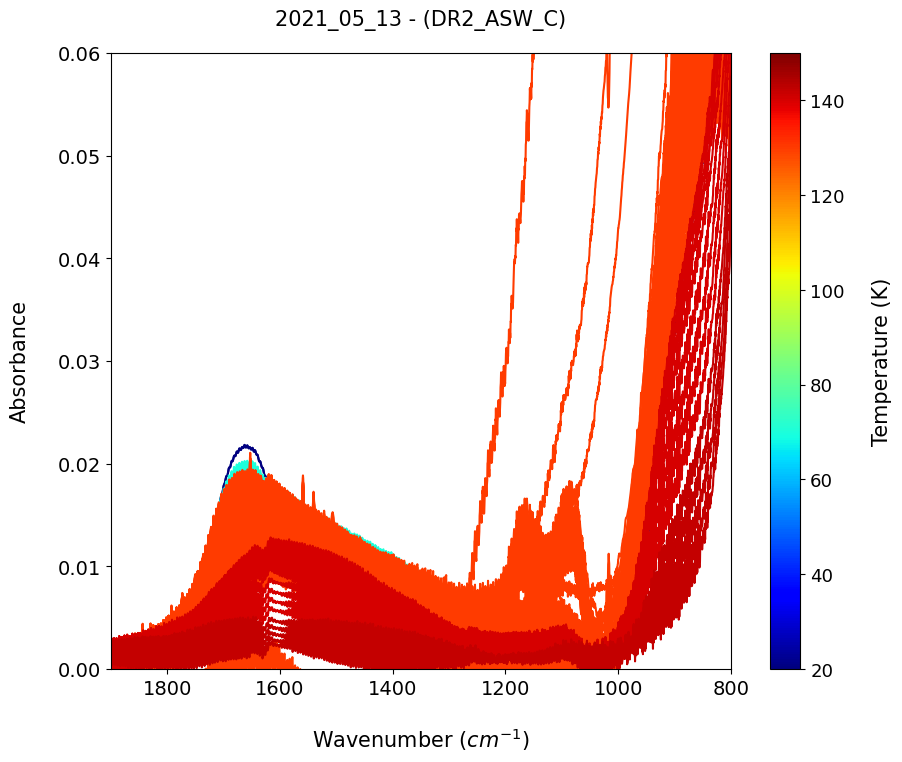

In [962]:
nscan = len(list(All_RAW_df.columns.values.tolist()))

print(nscan)


fig= plt.figure(figsize=(10,8))

for keys, values in Tdictionary.items():
    
    temp = int(keys)
    scan = json.loads(values)

    normalize = mcolors.Normalize(vmin=Tmin, vmax=Tmax)
    colormap = cm.jet

    for i in scan:
        
                
        if i < 848:
        
           

            plt.plot(dataC_BC.Wavenumber, dataC_BC['{}_{}_{}'.format(spl, date, i)], color=colormap(normalize(temp)))
        

plt.title('{0} - (DR2_ASW_C)'.format(date), fontsize=15, pad=20)
plt.axis([1900,800,0,0.06])
plt.xlabel('Wavenumber ($cm^{-1}$)', labelpad=20).set_fontsize(15)
plt.ylabel('Absorbance', labelpad=20).set_fontsize(15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#ax = fig.gca()
#plt.grid()
#plt.legend()

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(nscan)
cbar = plt.colorbar(scalarmappaple)
cbar.ax.tick_params(labelsize=13)
cbar.set_label('Temperature (K)', labelpad=20 ,size=15)

plt.savefig("..\..\Data\DATA_PROCESSING\{}\Plots\DR2_{}_C.png".format(date,date))

plt.show()

Plot the unreduced (BC) scans to see if a polynomial would be better

## <u>Data Annex Export</u>

<div class="alert alert-block alert-danger">
The data_annex that we import at the beginning of this notebook is not the one resulting from the DR1 reduction !! 
</div>

In [963]:
data_annex_df.to_csv("..\..\Data\DATA_PROCESSING\{}\Data\DR2_{}_data_annex.csv".format(date,date))

***

<img style="float: right;" src="..\..\Docs\Logo_work_in_progress.svg" alt="logo" width="160px"/>

## About this notebook

**Updated On:** 2022-11-17 


**Author:** Vincent Deguin, PhD Student.
<br>
 **Contact:** vincent.deguin@open.ac.uk  

